### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Columns:
1. Age - Age of the primary beneficiary
2. Sex - Gender of the insurance contractor
3. BMI - Body mass index
4. Children - Number of children covered by health insurance per number of dependents
5. Smoker - Smoking Boolean True/False
6. Region - Northeast, southeast, southwest, northwest
7. Charges - Medical Cost/Charges

In [2]:
#import dataset 
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### https://hevodata.com/learn/flask-mysql/

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Data Analysis

In [5]:
## Check for na values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no na values.

In [6]:
## check for duplicated values
df.duplicated().sum()

1

There are duplicate rows, hence it is important to remove the duplicated rows

In [7]:
df[df.duplicated(keep=False)] ## selecting rows with duplicated entries

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df = df.drop_duplicates()
df.duplicated().sum() ## succesfully removed the duplicated entries

0

Text(0.5, 1.0, 'Distribution of Charges')

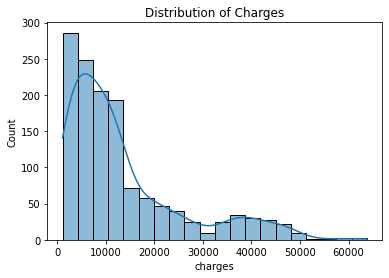

In [9]:
sns.histplot(data=df, x='charges', bins=20,kde=True)
plt.title('Distribution of Charges')

In [10]:
## Each column distribution 

<AxesSubplot:xlabel='sex', ylabel='count'>

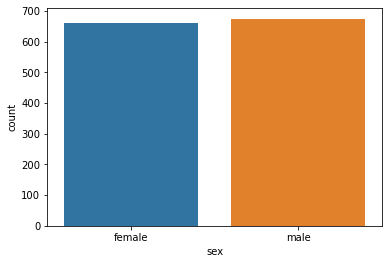

In [11]:
sns.countplot(data=df,x='sex')

<AxesSubplot:xlabel='children', ylabel='count'>

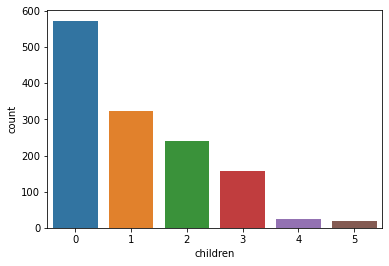

In [12]:
sns.countplot(data=df,x='children')

<AxesSubplot:xlabel='smoker', ylabel='count'>

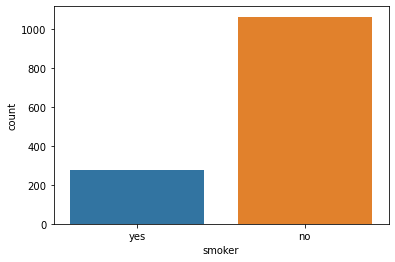

In [13]:
sns.countplot(data=df,x='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

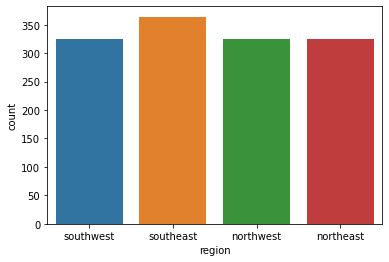

In [14]:
sns.countplot(data=df,x='region')

<AxesSubplot:xlabel='charges', ylabel='Count'>

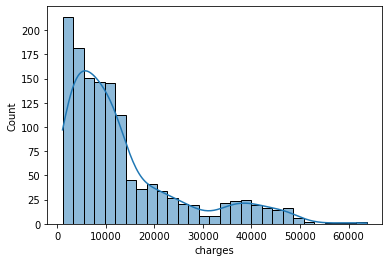

In [15]:
sns.histplot(data=df,x='charges',kde=True)

<AxesSubplot:xlabel='charges'>

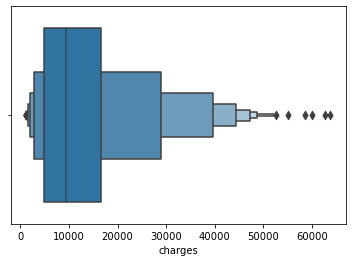

In [16]:
sns.boxenplot(data=df, x='charges')

<AxesSubplot:xlabel='charges', ylabel='Count'>

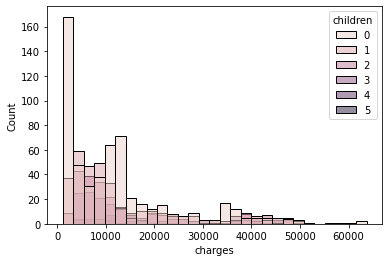

In [17]:
sns.histplot(data=df, x='charges', hue='children')

<AxesSubplot:xlabel='charges', ylabel='children'>

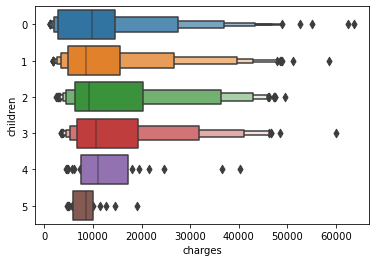

In [18]:
sns.boxenplot(data=df, x='charges',y='children',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

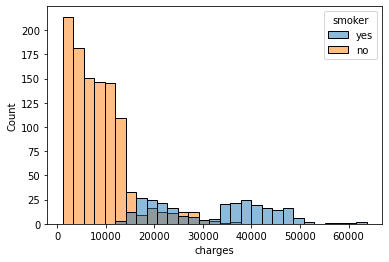

In [19]:
sns.histplot(data=df, x='charges', hue='smoker')

<AxesSubplot:xlabel='charges', ylabel='smoker'>

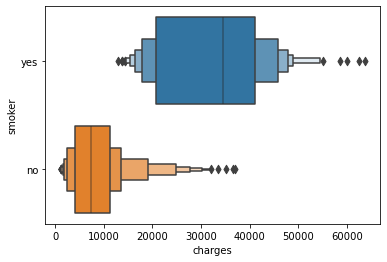

In [20]:
sns.boxenplot(data=df, x='charges',y='smoker',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

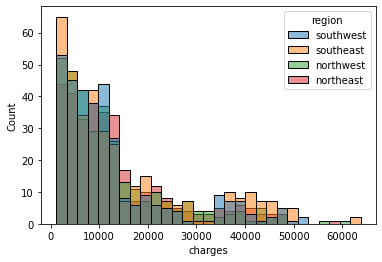

In [21]:
sns.histplot(data=df, x='charges', hue='region')

<AxesSubplot:xlabel='charges', ylabel='region'>

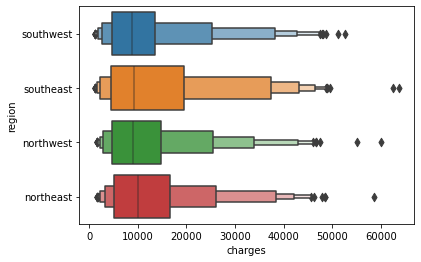

In [22]:
sns.boxenplot(data=df, x='charges',y='region',orient='h')

<AxesSubplot:xlabel='charges', ylabel='Count'>

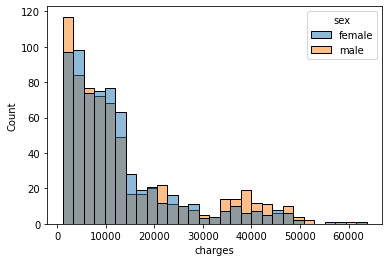

In [23]:
sns.histplot(data=df, x='charges', hue='sex')

<AxesSubplot:xlabel='charges', ylabel='sex'>

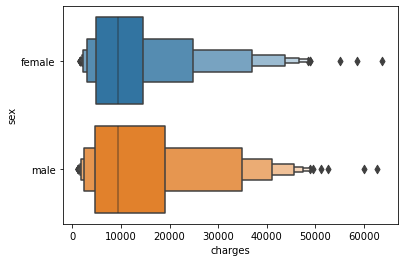

In [24]:
sns.boxenplot(data=df, x='charges',y='sex',orient='h')

In [25]:
### CHARGES VS SMOKERS

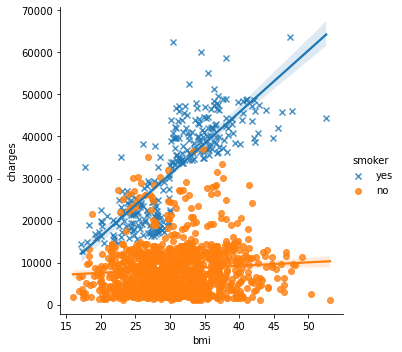

In [26]:
sns.lmplot(data=df,x='bmi',y='charges',hue='smoker',markers=['x','o'])

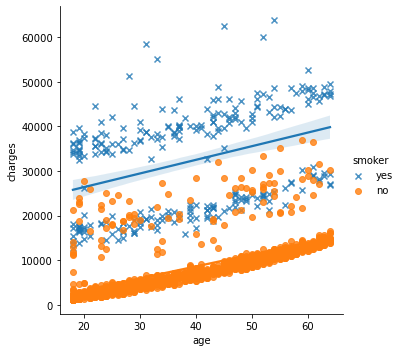

In [27]:
sns.lmplot(data=df,x='age',y='charges',hue='smoker',markers=['x','o'])

In [28]:
## Data Engineering

df_dummies = df.copy()

for i in df_dummies.columns:
    if df_dummies[i].dtype=='object':
        dummies = pd.get_dummies(df_dummies[i], prefix=f'{i}_')
        df_dummies = pd.concat([df_dummies, dummies], axis=1)
        df_dummies = df_dummies.drop(i,axis=1)

In [29]:
df_dummies.head()

,age,bmi,children,charges,sex__female,sex__male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [30]:
## Changing the columns having multiple classes to binary 0 or 1
## Added the name of each category after column name 
## Similar to One hot encoding;

## Show Correlation for all features

<AxesSubplot:>

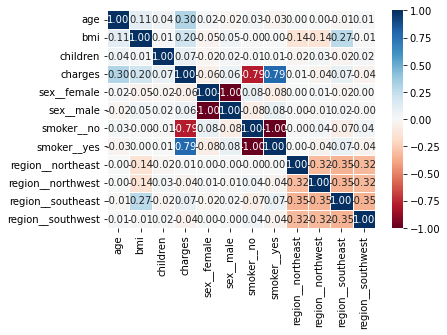

In [31]:
#figsize() -> increase the figure size 
sns.heatmap(df_dummies.corr(), fmt='0.2f', annot=True,cmap='RdBu',linewidths=1,
           )
# mask = np.triu(df_dummies.corr()) ->to mask everything above diagonal 

### Data Preperation


In [32]:
features = df_dummies.drop('charges', axis=1)
target = df_dummies[['charges']]

In [33]:
features

,age,bmi,children,sex__female,sex__male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [34]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [35]:
## Train and Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size=0.15, shuffle=True)

In [37]:
print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (1136, 11)
Test Size: (201, 11)


In [38]:
## 
lis_result = []

def model_prediction(model):
    fig,ax = plt.subplots(nrows=1, ncols=2,
                         figsize=(15,5), sharex=True,sharey=True)
    ax = ax.ravel()
    scores = []
    
    for index,degree in enumerate([1,2]):
        
        pipeline = Pipeline([
            ('degree', PolynomialFeatures(degree=degree)),
            ('scaled', MinMaxScaler()),
            ('model',model)
        ])
        
        pipeline.fit(X_train, Y_train)
        prediction = pipeline.predict(X_test)
        
        r2 = r2_score(prediction,Y_test).round(4)
        mae = mean_absolute_error(prediction, Y_test).round(2)
        rmse = np.sqrt(mean_squared_error(prediction,Y_test)).round(2)
        
        model_name = str(model).split('(')[0]
        
        scores.append([r2,mae,rmse])
        lis_result.append([f'{model_name}, Degree={degree}', r2,mae,rmse])
        
        ax[index].scatter(prediction, Y_test, color='darkcyan', alpha=0.4)
        
        ax[index].plot(np.arange(max(Y_test.values)),np.arange(max(Y_test.values)),
                       '-',color='r')
        ax[index].set_xlabel('Prediction')
        ax[index].set_ylabel('Real')
        ax[index].set_title(f'{model_name} with {degree} Degree')
        ax[index].legend([f'R2: {r2} \nMAE: {mae} \nRMSE: {rmse}'], loc='upper left')
        
    return pipeline

In [39]:
## https://www.kaggle.com/code/beachratchata/medical-cost-prediction-polynomial-regressions

In [40]:
import pickle

#### Why polynomial features used?
- To learn from non-linear trends, I have added polynomial features in the pipeline so the non-linear trends can be learnt as its not always a linear trend

### Linear Regression

In [41]:
##Running for different models

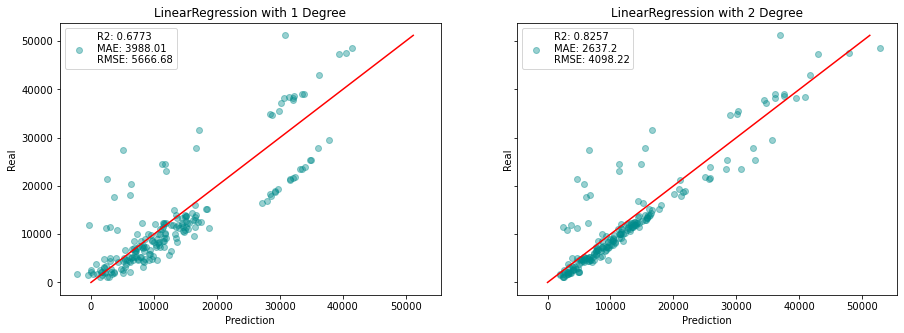

In [42]:
lin_reg = model_prediction(LinearRegression())
# lin_reg

In [43]:
lin_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', LinearRegression())])

In [44]:
# lin_reg.predict(X_test)
y_pred1 = lin_reg.predict(X_test)
mae1 = mean_absolute_error(y_pred1,Y_test).round(2)
mae1

2637.2

In [45]:
pickle.dump(lin_reg,open('Lin_Reg_model.pkl','wb'))

In [46]:
#Loading saved Model
pickled_lin_reg_model = pickle.load(open('Lin_Reg_model.pkl','rb'))
pickled_lin_reg_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', LinearRegression())])

In [47]:
y_pred_pkl_lr = pickled_lin_reg_model.predict(X_test)
mae = mean_absolute_error(y_pred_pkl_lr,Y_test).round(2)
mae

2637.2

### Lasso Regression

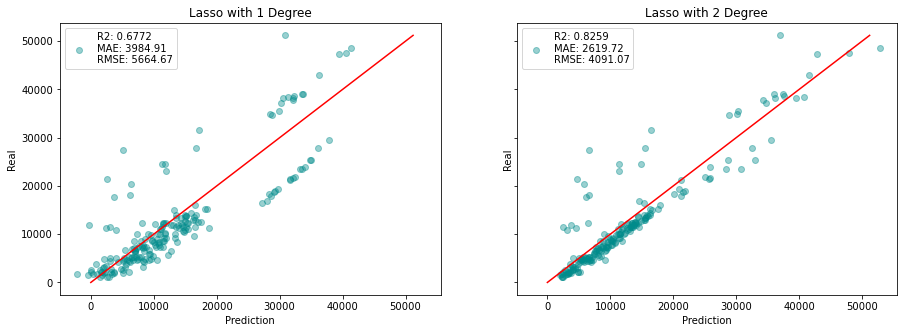

In [48]:
lasso_model = model_prediction(Lasso())

In [49]:
lasso_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', Lasso())])

In [50]:
pickle.dump(lasso_model,open('lasso_model.pkl','wb'))

In [51]:
#Loading saved Model
pickled_lasso_model = pickle.load(open('lasso_model.pkl','rb'))
pickled_lasso_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', Lasso())])

### Ridge Regression

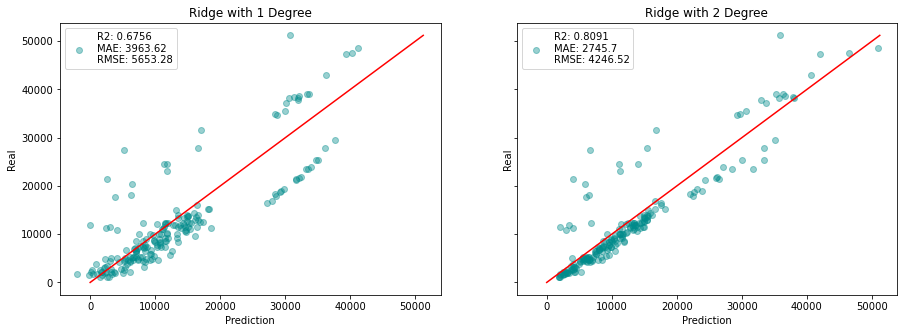

In [52]:
ridge_model = model_prediction(Ridge())

In [53]:
ridge_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', Ridge())])

In [54]:
pickle.dump(ridge_model,open('ridge_model.pkl','wb'))

In [55]:
#Loading saved Model
pickled_ridge_model = pickle.load(open('ridge_model.pkl','rb'))
pickled_ridge_model

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', Ridge())])

### Random Forest Regressor

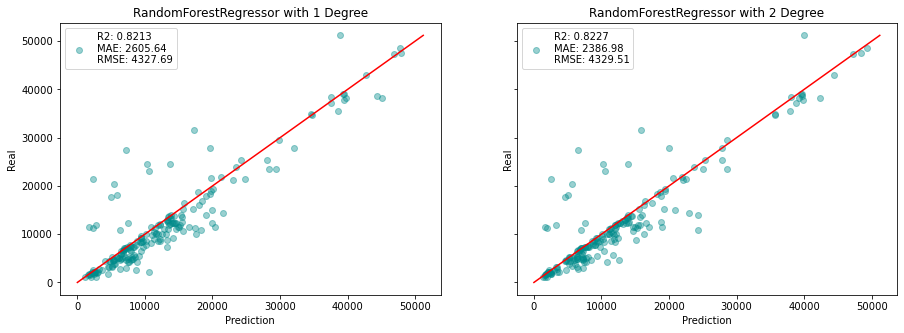

In [56]:
rf_reg = model_prediction(RandomForestRegressor())

In [57]:
rf_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', RandomForestRegressor())])

In [58]:
pickle.dump(lin_reg,open('rf_reg.pkl','wb'))

In [59]:
#Loading saved Model
pickled_rf_reg = pickle.load(open('rf_reg.pkl','rb'))
pickled_rf_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model', LinearRegression())])

### XGBRegressor

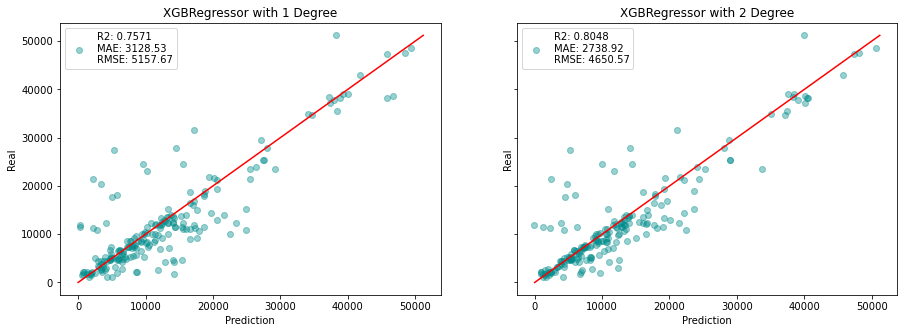

In [60]:
xgb_reg = model_prediction(XGBRegressor())

In [61]:
xgb_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [62]:
pickle.dump(xgb_reg,open('xgb_reg.pkl','wb'))

In [63]:
#Loading saved Model
pickled_xgb_reg = pickle.load(open('xgb_reg.pkl','rb'))
pickled_xgb_reg

Pipeline(steps=[('degree', PolynomialFeatures()), ('scaled', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

### Best Model based on R2 score, RMSE and MAE

In [65]:
lis_result

[['LinearRegression, Degree=1', 0.6773, 3988.01, 5666.68],
 ['LinearRegression, Degree=2', 0.8257, 2637.2, 4098.22],
 ['Lasso, Degree=1', 0.6772, 3984.91, 5664.67],
 ['Lasso, Degree=2', 0.8259, 2619.72, 4091.07],
 ['Ridge, Degree=1', 0.6756, 3963.62, 5653.28],
 ['Ridge, Degree=2', 0.8091, 2745.7, 4246.52],
 ['RandomForestRegressor, Degree=1', 0.8213, 2605.64, 4327.69],
 ['RandomForestRegressor, Degree=2', 0.8227, 2386.98, 4329.51],
 ['XGBRegressor, Degree=1', 0.7571, 3128.53, 5157.67],
 ['XGBRegressor, Degree=2', 0.8048, 2738.92, 4650.57]]

In [64]:
lis_result[7]

['RandomForestRegressor, Degree=2', 0.8227, 2386.98, 4329.51]

In [91]:
df_result = pd.DataFrame(lis_result, columns=['Model','R2','MAE','RMSE']).sort_values(
['MAE','RMSE'],ignore_index=True).set_index('Model')

In [96]:
df_result

,R2,MAE,RMSE
Model,,,
"RandomForestRegressor, Degree=2",0.7861,2722.01,4863.39
"RandomForestRegressor, Degree=1",0.7723,2818.11,4919.57
"XGBRegressor, Degree=1",0.7661,2846.81,5051.68
"XGBRegressor, Degree=2",0.7731,2850.01,5100.36
"LinearRegression, Degree=2",0.7805,2882.30,4847.45
"Lasso, Degree=2",0.7803,2882.78,4764.53
"Ridge, Degree=2",0.7659,2998.66,4869.20
"Ridge, Degree=1",0.6151,4310.50,6159.77
"Lasso, Degree=1",0.6174,4325.57,6164.09


In [97]:
df_result.sort_values(by='R2',ascending=False)

,R2,MAE,RMSE
Model,,,
"RandomForestRegressor, Degree=2",0.7861,2722.01,4863.39
"LinearRegression, Degree=2",0.7805,2882.30,4847.45
"Lasso, Degree=2",0.7803,2882.78,4764.53
"XGBRegressor, Degree=2",0.7731,2850.01,5100.36
"RandomForestRegressor, Degree=1",0.7723,2818.11,4919.57
"XGBRegressor, Degree=1",0.7661,2846.81,5051.68
"Ridge, Degree=2",0.7659,2998.66,4869.20
"LinearRegression, Degree=1",0.6178,4326.52,6163.66
"Lasso, Degree=1",0.6174,4325.57,6164.09


In [98]:
## Saving the Models in Pickle Models 

In [1]:
#import
import flask


In [3]:
# import sys
# import traceback

# @app.errorhandler(500)
# def internal_error(exception):
#     print("500 error caught")
#     etype, value, tb = sys.exc_info()
#     print(traceback.print_exception(etype, value, tb))

from flask import jsonify, request
#Whenever API called, we will return the game dictionary


app = flask.Flask(__name__)
app.config['DEBUG']=True

app.run(())

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1